In [3]:
import mphot
import numpy as np
import matplotlib.pyplot as plt


In [67]:
def binning(x, y, bins, error=None, std=False, mean_method=np.mean,
            mean_error_method=lambda x: np.sqrt(np.sum(np.power(x, 2))) / len(x)):
    """
        Bin data points into specified bins and compute the mean of each bin.

        Parameters:
        x : array-like
            The independent variable data points.
        y : array-like
            The dependent variable data points to be binned.
        bins : int or array-like
            The number of bins or the bin edges.
        error : array-like, optional
            The errors associated with the dependent variable data points.
        std : bool, optional
            If True, return the standard deviation of the binned data.
        mean_method : function, optional
            The method to compute the mean of the binned data. Default is np.mean.
        mean_error_method : function, optional
            The method to compute the mean error of the binned data. Default is 
            lambda x: np.sqrt(np.sum(np.power(x, 2))) / len(x).

        Returns:
        tuple
            If std is True, returns (final_bins, binned_flux, _std).
            If error is provided, returns (final_bins, binned_flux, binned_error).
            Otherwise, returns (final_bins, binned_flux).

        final_bins : array-like
            The mean values of the independent variable in each bin.
        binned_flux : array-like
            The mean values of the dependent variable in each bin.
        binned_error : array-like, optional
            The mean errors of the dependent variable in each bin.
        _std : array-like, optional
            The standard deviation of the dependent variable in each bin.
    """

    bins = np.arange(np.min(x), np.max(x), bins)
    d = np.digitize(x, bins)

    final_bins = []
    binned_flux = []
    binned_error = []
    _std = []

    for i in range(1, np.max(d) + 1):
        s = np.where(d == i)
        if len(s[0]) > 0:
            binned_flux.append(mean_method(y[s[0]]))
            final_bins.append(np.mean(x[s[0]]))
            _std.append(np.std(y[s[0]]) / np.sqrt(len(s[0])))
            if error is not None:
                binned_error.append(mean_error_method(error[s[0]]))

    if std:
        return np.array(final_bins), np.array(binned_flux), np.array(_std)
    elif error is not None and isinstance(error, (np.ndarray, list)):
        return np.array(final_bins), np.array(binned_flux), np.array(binned_error)
    else:
        return np.array(final_bins), np.array(binned_flux)

In [68]:
instrument_efficiency_path = '../resources/systems/speculoos_Andor_iKon-L-936_-60.csv' # index in microns, efficiency of telescope+instrument as fraction
filter_path = '../resources/filters/I+z.csv' # index in microns, filter efficiency as fraction

name, system_response = mphot.generate_system_response(instrument_efficiency_path, filter_path)

`/Users/peter/Github/mphot/src/mphot/datafiles/system_responses/speculoos_Andor_iKon-L-936_-60_I+z_instrument_system_response.csv` has been generated and saved!


<Axes: title={'center': 'speculoos_Andor_iKon-L-936_-60_I+z'}, xlabel='Wavelength (microns)', ylabel='System Response'>

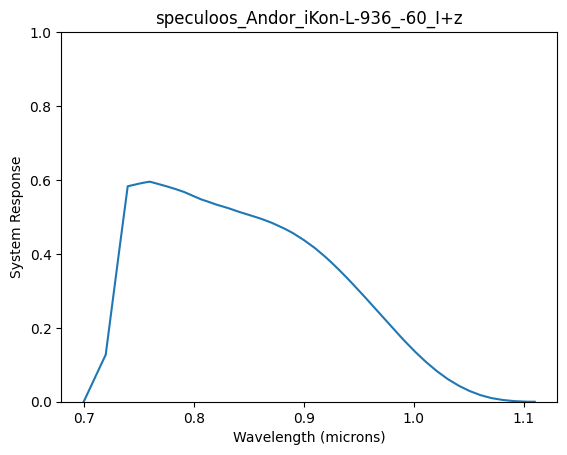

In [69]:
system_response.plot(xlabel='Wavelength (microns)', ylabel='System Response', title=name, ylim=(0, 1))

In [70]:
# sky properties
props_sky = {
    "pwv" : 2.5,        # PWV [mm]
    "airmass" : 1.1,    # airmass
    "seeing" : 1.35     # seeing (==FWHM) ["]
}

# instrument properties
props_instrument = {
    "name" : name,          # name to get SR/precision grid from file
    "plate_scale" : 0.35,   # pixel plate scale ["]
    "N_dc" : 0.2,           # dark current [e/pix/s]
    "N_rn" : 6.328,         # read noise [e_rms/pix]
    "well_depth" : 64000,   # well depth [e/pix]
    "well_fill" : 0.7,      # fractional value to fill central target pixel, assuming gaussian (width function of seeing^)
    "read_time" : 10.5,     # read time between images [s]
    "r0" : 0.5,             # radius of telescope's primary mirror [m]
    "r1" : 0.14,            # radius of telescope's secondary mirror [m]
    # "min_exp" : 0,          # optional, minimum exposure time [s]
    # "max_exp" : 120,        # optional, maximum exposure time [s]
    # "ap_rad" : 3            # optional, aperture radius [FWHM, seeing] for photometry -- 3 default == 7 sigma of Gaussian
}

# target properties
Teff = 2566       # [K]
distance = 12.5   # [pc]


In [71]:
# get the precision and components used to calculate it (generates grid if not already present)
result = mphot.get_precision(props_instrument, props_sky, Teff, distance)

mphot.display_results(result)

,single frame [ppt],10 minute binned [ppt]
,speculoos_Andor_iKon-L-936_-60_I+z,speculoos_Andor_iKon-L-936_-60_I+z
All,1.50,0.537
Star,1.14,0.409
Scintillation,0.516,0.184
Sky,0.802,0.286
Dark current,0.0977,0.0349
Read noise,0.170,0.0608


,speculoos_Andor_iKon-L-936_-60_I+z
Teff [K],2.57e+3
distance [pc],12.5
N_star [e/s],1.16e+4
star_flux [e/m2/s],1.77e+4
scn [e_rms],394
pixels in aperture [pix],421
ap_radius [pix],11.6
N_sky [e/pix/s],13.5
sky_radiance [e/m2/arcsec2/s],152
seeing [arcsec],1.35


,speculoos_Andor_iKon-L-936_-60_I+z
star [mag],13.7
sky [mag/arcsec2],18.8
vega_flux [e/s],3.64e+9


In [72]:
# extract data
image_precision, binned_precision, components = result

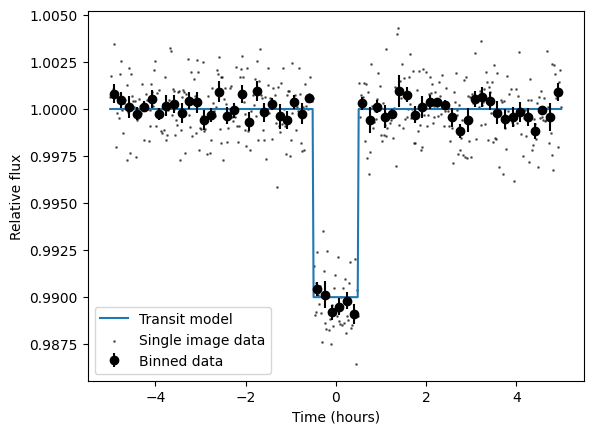

In [78]:
# basic transit time series

depth = 0.01 # 1% transit depth
duration = 1 # 1 hour transit duration

time = np.arange(-duration*5, duration*5, (components['t [s]'] + components['read_time [s]'])/3600)

transit = np.ones_like(time)
transit[(time > -duration/2) & (time < duration/2)] -= depth

# add noise
noise = np.random.normal(0, image_precision['All'], len(time))
flux = transit + noise

# plot
fig, ax = plt.subplots()
ax.plot(time, transit, label='Transit model')
ax.scatter(time, flux, s=1, color='k', alpha=0.5, label='Single image data')
ax.errorbar(*binning(np.array(time), np.array(flux), components['binning [mins]']/60, std=True), linestyle='None', marker='o', color='k', alpha=1, label='Binned data')

ax.set_xlabel('Time (hours)')
ax.set_ylabel('Relative flux')
ax.legend()